/workspaces/STdata_prediction/.venv/lib/python3.12/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


Time len:  6515
Split Speed finished. Start to generate Mask, Delta, Last_observed_X ...
Generate Mask, Delta, Last_observed_X finished. Start to shuffle and split dataset ...
Finished
Model Structure:  LGnet(
  (il): Linear(in_features=1428, out_features=325, bias=True)
  (fl): Linear(in_features=1428, out_features=325, bias=True)
  (ol): Linear(in_features=1428, out_features=325, bias=True)
  (cl): Linear(in_features=1428, out_features=325, bias=True)
  (fc): Linear(in_features=325, out_features=325, bias=True)
  (gamma_z_l): FilterLinear(in_features=325, out_features=325, bias=True)
  (gamma_z_prime_l): FilterLinear(in_features=325, out_features=325, bias=True)
  (q_for_memory): Linear(in_features=975, out_features=128, bias=True)
)
Start Training ... 
Output type dermined by the model


/workspaces/STdata_prediction/.venv/lib/python3.12/site-packages/torch/nn/modules/conv.py:306: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv1d(input, weight, bias, self.stride,
/workspaces/STdata_prediction/.venv/lib/python3.12/site-packages/torch/autograd/graph.py:744: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
/tmp/ipykernel_88320/3455063521.py:87: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotli

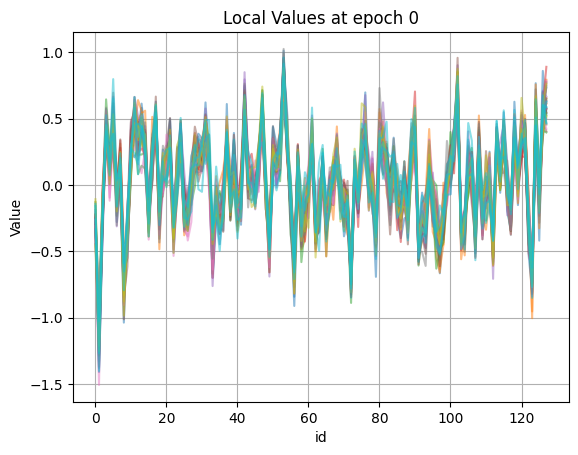

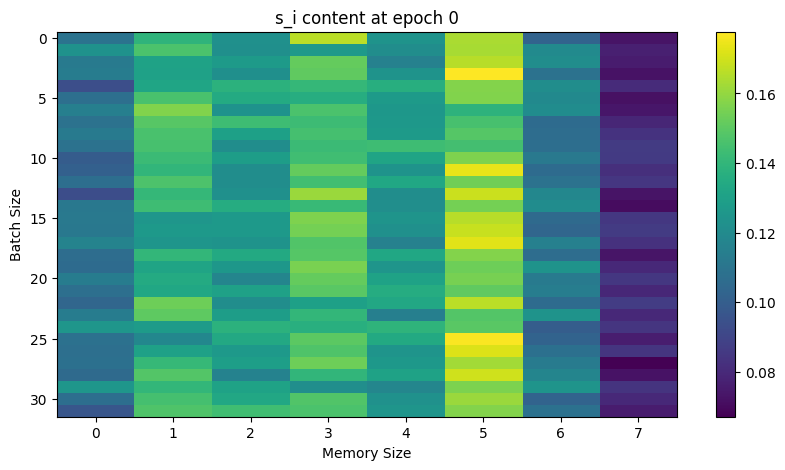

/tmp/ipykernel_88320/3455063521.py:67: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', num_batchs)


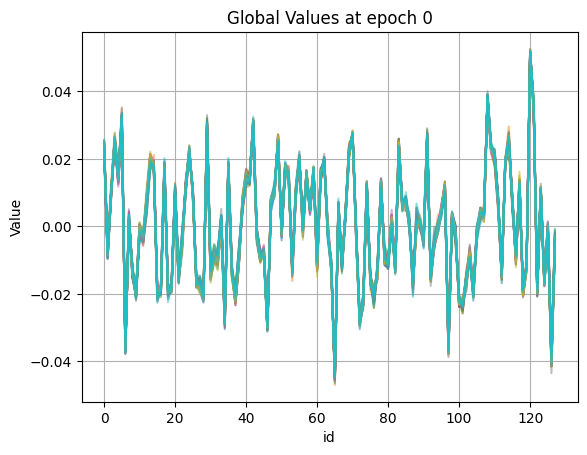

Epoch: 0, train_loss: -0.00925541, d_loss_real: 0.78429128, d_loss_fake: 0.23927092, valid_loss: 0.01350445, time: [12.06], best model: 1
Epoch 0: GPU memory allocated at end of epoch: 70.15 MB
Epoch: 1, train_loss: -0.00067091, d_loss_real: 0.9511045, d_loss_fake: 0.05020669, valid_loss: 0.00585964, time: [10.39], best model: 1
Epoch 1: GPU memory allocated at end of epoch: 75.91 MB
Epoch: 2, train_loss: 0.00181108, d_loss_real: 0.98416277, d_loss_fake: 0.01507035, valid_loss: 0.00430615, time: [10.79], best model: 1
Epoch 2: GPU memory allocated at end of epoch: 81.66 MB
Epoch: 3, train_loss: 0.00243758, d_loss_real: 0.99422304, d_loss_fake: 0.00532043, valid_loss: 0.00387539, time: [10.66], best model: 1
Epoch 3: GPU memory allocated at end of epoch: 87.42 MB
Epoch: 4, train_loss: 0.00255233, d_loss_real: 0.9975371, d_loss_fake: 0.0020904, valid_loss: 0.00358019, time: [10.55], best model: 1
Epoch 4: GPU memory allocated at end of epoch: 93.17 MB
Epoch: 5, train_loss: 0.00260214, d_

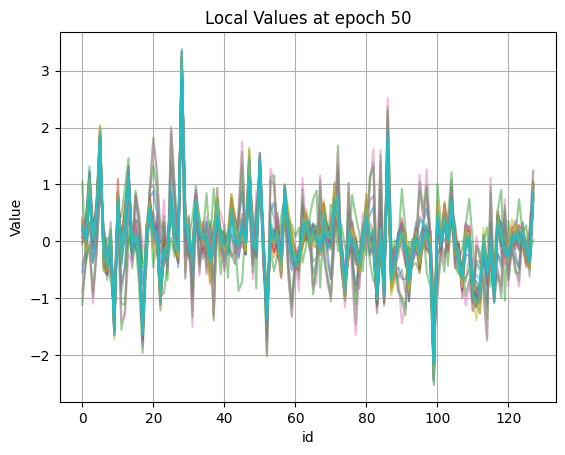

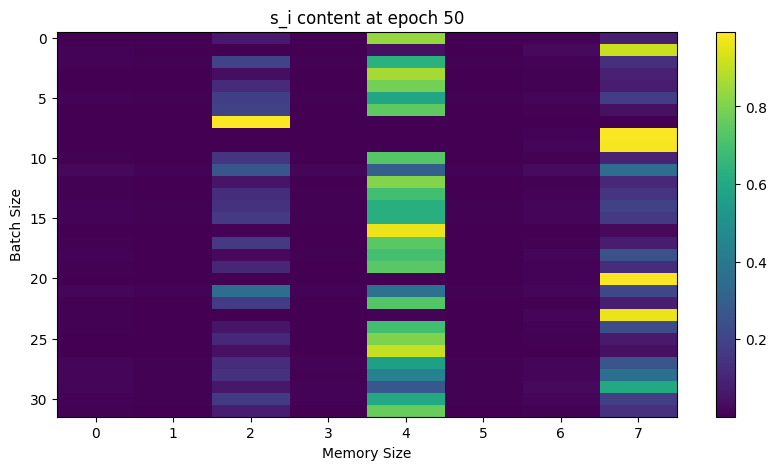

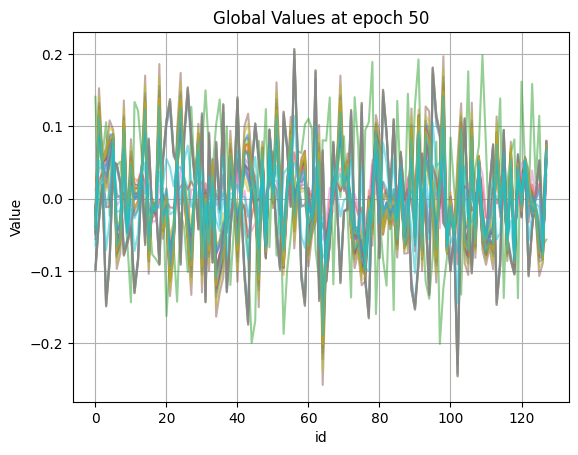

Epoch: 50, train_loss: 0.0010129, d_loss_real: 0.99999602, d_loss_fake: 2.76e-06, valid_loss: 0.00206264, time: [11.76], best model: 1
Epoch 50: GPU memory allocated at end of epoch: 357.89 MB
Epoch: 51, train_loss: 0.00101451, d_loss_real: 0.99997335, d_loss_fake: 2.627e-05, valid_loss: 0.00206877, time: [11.13], best model: 0
Epoch 51: GPU memory allocated at end of epoch: 363.65 MB
Epoch: 52, train_loss: 0.00101074, d_loss_real: 0.99997872, d_loss_fake: 0.00010117, valid_loss: 0.00207137, time: [11.55], best model: 0
Epoch 52: GPU memory allocated at end of epoch: 369.40 MB
Epoch: 53, train_loss: 0.00098294, d_loss_real: 0.99999345, d_loss_fake: 2.97e-06, valid_loss: 0.00203383, time: [11.39], best model: 1
Epoch 53: GPU memory allocated at end of epoch: 375.16 MB
Epoch: 54, train_loss: 0.00098059, d_loss_real: 0.99999925, d_loss_fake: 2e-06, valid_loss: 0.00204585, time: [11.41], best model: 0
Epoch 54: GPU memory allocated at end of epoch: 380.91 MB
Epoch: 55, train_loss: 0.000969

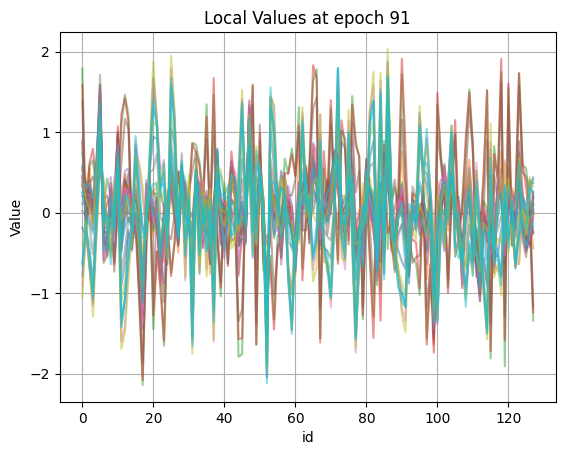

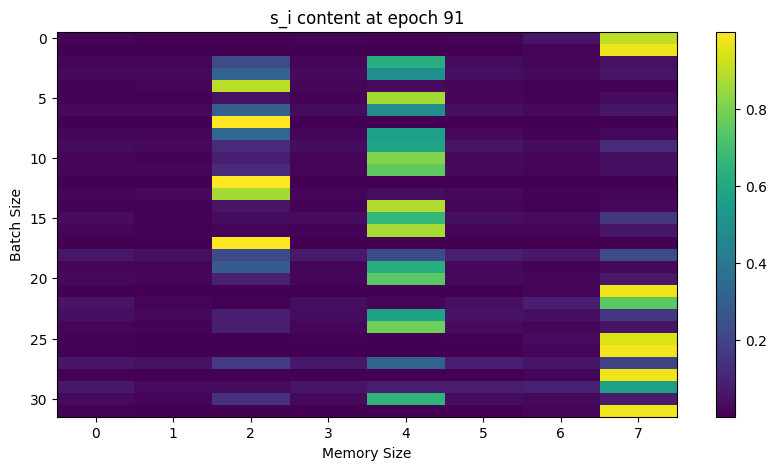

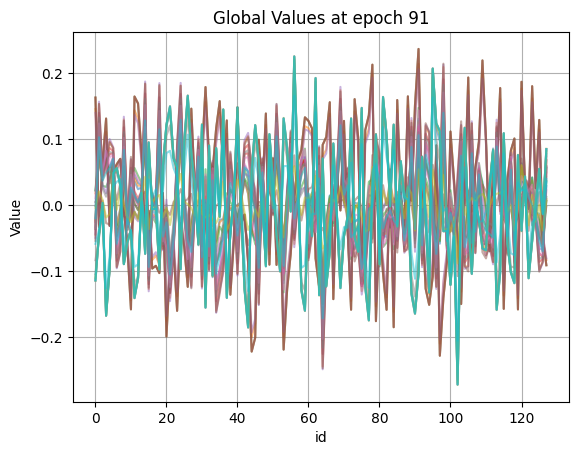

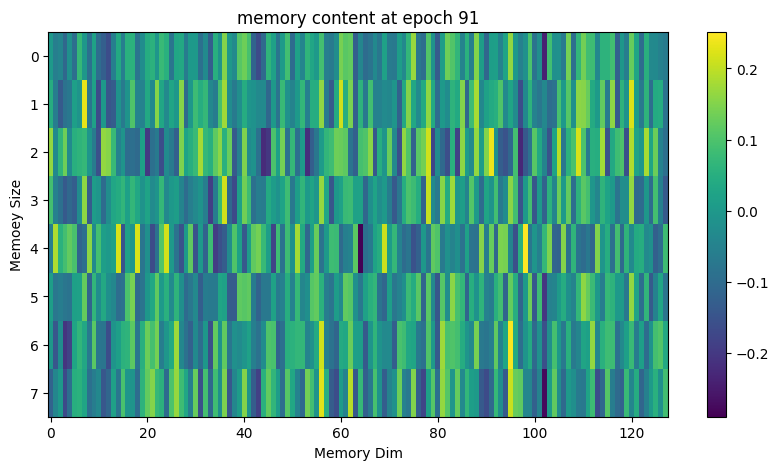

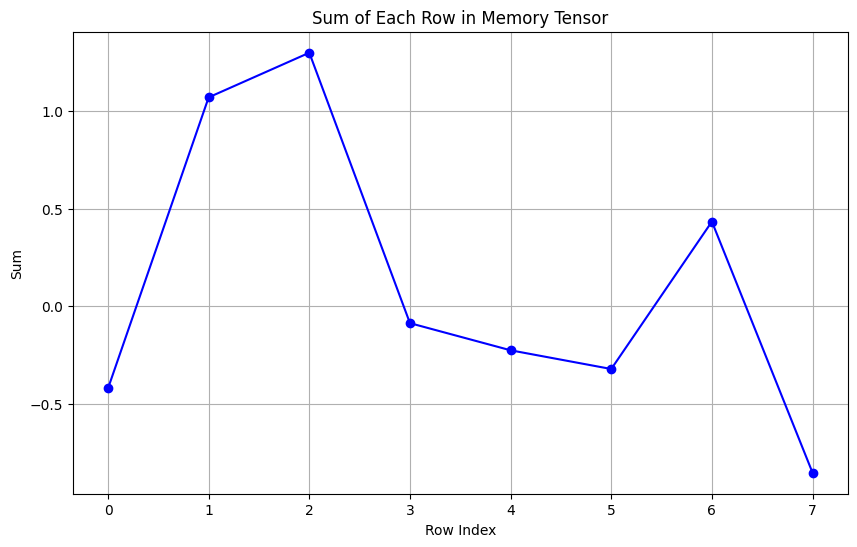

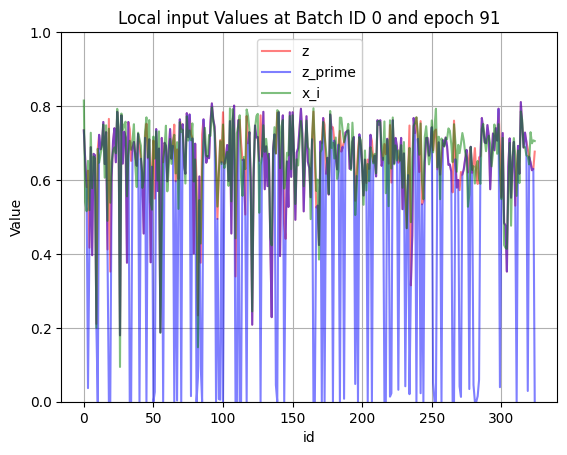

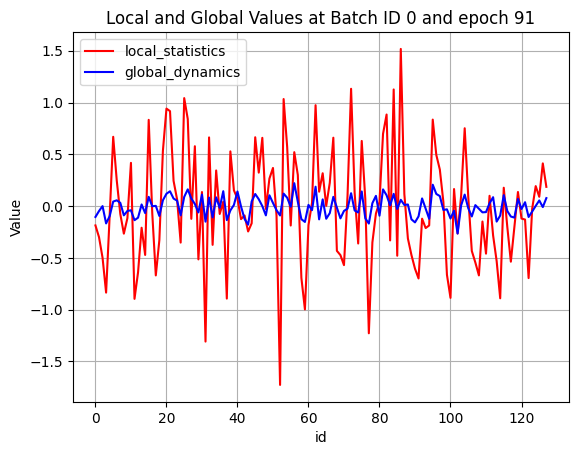

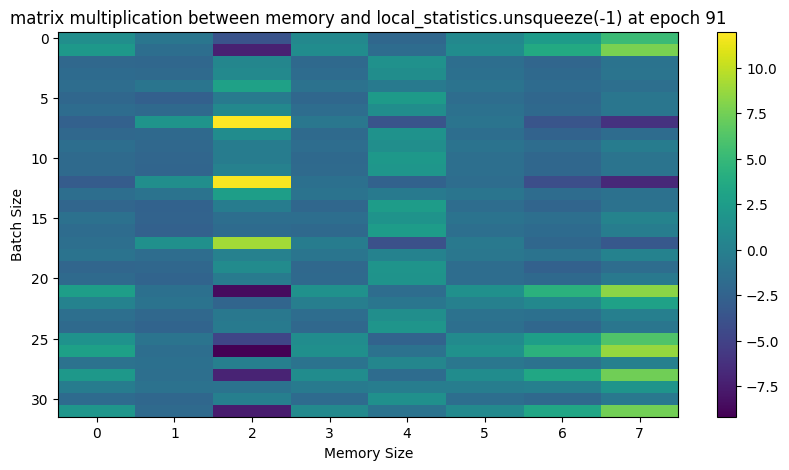

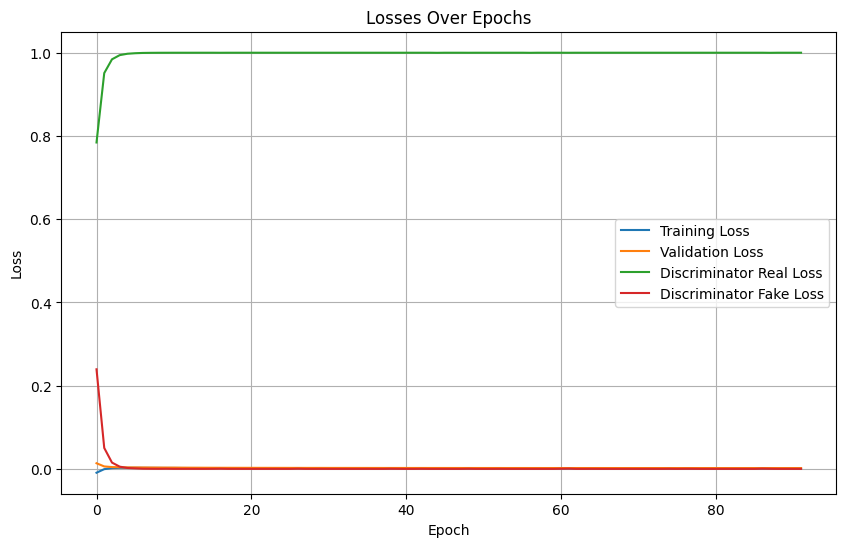

Tested: L1_mean: 2.088460278697312, L1_std: 0.5444726322311908, MAE: 2.088460278697312, MAPE: 4.022173210978508


In [1]:
import time

import h5py
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.utils.data as utils
from Discriminator import *
from LGnet_pre_vis_memory import *


def wasserstein_loss(y_pred, y_true):
    return torch.mean(y_pred * y_true)

def plot_heatmap(s_i, epoch):
    s_i_np = s_i.cpu().detach().numpy()
    plt.figure(figsize=(10, 5))
    plt.imshow(s_i_np, aspect='auto', cmap='viridis')
    plt.colorbar()
    plt.title(f's_i content at epoch {epoch}')
    plt.xlabel('Memory Size')
    plt.ylabel('Batch Size')
    plt.show()

def plot_memorymap(memory, epoch):
    memory_np = memory.cpu().detach().numpy()
    plt.figure(figsize=(10, 5))
    plt.imshow(memory_np, aspect='auto', cmap='viridis')
    plt.colorbar()
    plt.title(f'memory content at epoch {epoch}')
    plt.xlabel('Memory Dim')
    plt.ylabel('Memoey Size')
    plt.show()

def plot_memory_mat_local(memory, epoch):
    memory_np = memory.cpu().detach().numpy()
    plt.figure(figsize=(10, 5))
    plt.imshow(memory_np, aspect='auto', cmap='viridis')
    plt.colorbar()
    plt.title(f'matrix multiplication between memory and local_statistics.unsqueeze(-1) at epoch {epoch}')
    plt.xlabel('Memory Size')
    plt.ylabel('Batch Size')
    plt.show()

def plot_localglobal_graph(local_statistics, global_dynamics, batch_id, epoch):
    local_values = local_statistics[batch_id, :].cpu().detach().numpy()
    global_values = global_dynamics[batch_id, :].cpu().detach().numpy()
    num_dimensions = local_values.shape[0]

    indices = np.arange(num_dimensions)    
    plt.plot(indices, local_values, linestyle='-', label='local_statistics', color='r')
    plt.plot(indices, global_values, linestyle='-', label='global_dynamics', color='b')

    plt.xlabel('id')
    plt.ylabel('Value')
    plt.title(f'Local and Global Values at Batch ID {batch_id} and epoch {epoch}')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_globals_graph(global_dynamics, epoch):
    global_values = global_dynamics[:, :].cpu().detach().numpy()
    num_dimensions = global_values.shape[1]
    num_batchs = global_values.shape[0]
    colors = plt.cm.get_cmap('tab10', num_batchs) 

    indices = np.arange(num_dimensions)
    for i, idx in enumerate(range(num_batchs)):
        if idx < num_batchs:
            values_index = global_values[idx, :]
            plt.plot(indices, values_index, linestyle='-', label=f'Values at Batch ID {i}', 
                        color=colors(i), alpha=0.5)

    plt.xlabel('id')
    plt.ylabel('Value')
    plt.title(f'Global Values at epoch {epoch}')
    #plt.legend()
    plt.grid(True)
    plt.show()

def plot_locals_graph(local_statistics, epoch):
    local_values = local_statistics[:, :].cpu().detach().numpy()
    num_dimensions = local_values.shape[1]
    num_batchs = local_values.shape[0]
    colors = plt.cm.get_cmap('tab10', num_batchs) 

    indices = np.arange(num_dimensions)
    for i, idx in enumerate(range(num_batchs)):
        if idx < num_batchs:
            values_index = local_values[idx, :]
            plt.plot(indices, values_index, linestyle='-', label=f'Values at Batch ID {i}', 
                        color=colors(i), alpha=0.5)

    plt.xlabel('id')
    plt.ylabel('Value')
    plt.title(f'Local Values at epoch {epoch}')
    #plt.legend()
    plt.grid(True)
    plt.show()

def plot_local_input_graph(z, z_prime, x_i, batch_id, epoch):
    z_values = z[batch_id, :].cpu().detach().numpy()
    z_prime_values = z_prime[batch_id, :].cpu().detach().numpy()
    x_i_values = x_i[batch_id, :].cpu().detach().numpy()
    num_dimensions = z_values.shape[0]

    indices = np.arange(num_dimensions)
      
    plt.plot(indices, z_values, linestyle='-', label='z', color='r', alpha=0.5)
    plt.plot(indices, z_prime_values, linestyle='-', label='z_prime', color='b', alpha=0.5)  
    plt.plot(indices, x_i_values, linestyle='-', label='x_i', color='g', alpha=0.5)

    plt.xlabel('id')
    plt.ylabel('Value')
    plt.title(f'Local input Values at Batch ID {batch_id} and epoch {epoch}')
    plt.legend()
    plt.grid(True)
    plt.ylim(0, 1)
    plt.show()
    

def plot_losses_combined(losses_train, losses_valid, losses_d_real, losses_d_fake, filename):
    plt.figure(figsize=(10, 6))

    plt.plot(losses_train, label="Training Loss")
    plt.plot(losses_valid, label="Validation Loss")
    plt.plot(losses_d_real, label="Discriminator Real Loss")
    plt.plot(losses_d_fake, label="Discriminator Fake Loss")

    plt.title("Losses Over Epochs")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid(True)

    plt.savefig(filename)
    plt.show()

def plot_sum_memory(memory, epoch):
    memory_np = memory.cpu().detach().numpy()
    # 各列の総和を計算
    column_sums = np.sum(memory_np, axis=1)

    # グラフを描画
    plt.figure(figsize=(10, 6))
    plt.plot(column_sums, marker='o', linestyle='-', color='b')
    plt.title('Sum of Each Row in Memory Tensor')
    plt.xlabel('Row Index')
    plt.ylabel('Sum')
    plt.grid(True)
    plt.show()


def PrepareDataset(
    speed_matrix,
    BATCH_SIZE=40,
    seq_len=10,
    pred_len=1,
    train_propotion=0.7,
    valid_propotion=0.2,
    masking=False,
    mask_ones_proportion=0.8,
    split_num=8,
):
    """Prepare training and testing datasets and dataloaders.

    Convert speed/volume/occupancy matrix to training and testing dataset.
    The vertical axis of speed_matrix is the time axis and the horizontal axis
    is the spatial axis.

    Args:
        speed_matrix: a Matrix containing spatial-temporal speed data for a network
        seq_len: length of input sequence
        pred_len: length of predicted sequence
    Returns:
        Training dataloader
        Testing dataloader
    """

    speed_matrix_s = np.array_split(speed_matrix, split_num)
    speed_matrix = speed_matrix_s[0]
    time_len = speed_matrix.shape[0]
    print("Time len: ", time_len)

    speed_matrix = speed_matrix.clip(0, 100)

    max_speed = speed_matrix.max().max()
    speed_matrix = speed_matrix / max_speed

    np.random.seed(1024)
    Mask = np.random.choice([0, 1], size=(speed_matrix.shape), p=[1 - mask_ones_proportion, mask_ones_proportion])
    speed_matrix_m = np.multiply(speed_matrix, Mask)

    speed_sequences, speed_labels, speed_labels_unmask = [], [], []
    for i in range(time_len - seq_len - pred_len):
        speed_sequences.append(speed_matrix_m.iloc[i : i + seq_len].values)
        speed_labels.append(speed_matrix_m.iloc[i + seq_len : i + seq_len + pred_len].values)
        speed_labels_unmask.append(speed_matrix.iloc[i + seq_len : i + seq_len + pred_len].values)
    speed_sequences, speed_labels, speed_labels_unmask = (
        np.asarray(speed_sequences),
        np.asarray(speed_labels),
        np.asarray(speed_labels_unmask),
    )

    # using zero-one mask to randomly set elements to zeros
    if masking:
        print("Split Speed finished. Start to generate Mask, Delta, Last_observed_X ...")
        Mask = np.where(speed_sequences == 0, 0, 1)
        Mask_l = np.where(speed_labels == 0, 0, 1)
        speed_sequences = np.multiply(speed_sequences, Mask)

        # temporal information
        interval = 5  # 5 minutes
        S = np.zeros_like(speed_sequences)  # time stamps
        for i in range(S.shape[1]):
            S[:, i, :] = interval * i

        Delta = np.zeros_like(speed_sequences)  # time intervals
        for i in range(1, S.shape[1]):
            Delta[:, i, :] = S[:, i, :] - S[:, i - 1, :]

        # Calculate Delta_b (backward direction)
        Delta_b = np.zeros_like(speed_sequences)
        for i in range(0, S.shape[1] - 1):
            Delta_b[:, i, :] = S[:, i + 1, :] - S[:, i, :]

        missing_index = np.where(Mask == 0)

        X_last_obsv = np.copy(speed_sequences)
        X_last_obsv_b = np.copy(speed_sequences)
        for idx in range(missing_index[0].shape[0]):
            i = missing_index[0][idx]
            j = missing_index[1][idx]
            k = missing_index[2][idx]
            if j != 0 and j != 9:
                Delta[i, j + 1, k] = Delta[i, j + 1, k] + Delta[i, j, k]
            if j != 0:
                X_last_obsv[i, j, k] = X_last_obsv[i, j - 1, k]  # last observation

        Delta = Delta / Delta.max()  # normalize

        for idx in range(missing_index[0].shape[0], -1):
            i = missing_index[0][idx]
            j = missing_index[1][idx]
            k = missing_index[2][idx]
            if j != 0 and j != 9:
                Delta_b[i, j - 1, k] += Delta_b[i, j, k] + Delta_b[i, j - 1, k]
            if j != 9:
                X_last_obsv_b[i, j, k] = X_last_obsv_b[i, j + 1, k]

        Delta_b = Delta_b / Delta_b.max()  # normalize

    # shuffle and split the dataset to training and testing datasets
    print("Generate Mask, Delta, Last_observed_X finished. Start to shuffle and split dataset ...")
    sample_size = speed_sequences.shape[0]
    index = np.arange(sample_size, dtype=int)
    # np.random.seed(1024)
    # np.random.shuffle(index)

    speed_sequences = speed_sequences[index]
    speed_labels = speed_labels[index]
    speed_labels_unmask = speed_labels_unmask[index]

    if masking:
        X_last_obsv = X_last_obsv[index]
        Mask = Mask[index]
        Delta = Delta[index]
        X_last_obsv_b = X_last_obsv_b[index]
        Delta_b = Delta_b[index]

        speed_sequences = np.expand_dims(speed_sequences, axis=1)
        X_last_obsv = np.expand_dims(X_last_obsv, axis=1)
        Mask = np.expand_dims(Mask, axis=1)
        Delta = np.expand_dims(Delta, axis=1)
        X_last_obsv_b = np.expand_dims(X_last_obsv_b, axis=1)
        Delta_b = np.expand_dims(Delta_b, axis=1)

        dataset_agger = np.concatenate((speed_sequences, X_last_obsv, Mask, Delta, X_last_obsv_b, Delta_b), axis=1)

        speed_labels = np.expand_dims(speed_labels, axis=1)
        speed_labels_mask = np.expand_dims(Mask_l, axis=1)
        speed_labels_unmask = np.expand_dims(speed_labels_unmask, axis=1)

        speed_labels = np.concatenate((speed_labels, speed_labels_mask, speed_labels_unmask), axis=1)

    train_index = int(np.floor(sample_size * train_propotion))
    valid_index = int(np.floor(sample_size * (train_propotion + valid_propotion)))

    if masking:
        train_data, train_label = dataset_agger[:train_index], speed_labels[:train_index]
        valid_data, valid_label = dataset_agger[train_index:valid_index], speed_labels[train_index:valid_index]
        test_data, test_label = dataset_agger[valid_index:], speed_labels[valid_index:]
    else:
        train_data, train_label = speed_sequences[:train_index], speed_labels[:train_index]
        valid_data, valid_label = speed_sequences[train_index:valid_index], speed_labels[train_index:valid_index]
        test_data, test_label = speed_sequences[valid_index:], speed_labels[valid_index:]

    train_data, train_label = torch.Tensor(train_data), torch.Tensor(train_label)
    valid_data, valid_label = torch.Tensor(valid_data), torch.Tensor(valid_label)
    test_data, test_label = torch.Tensor(test_data), torch.Tensor(test_label)

    train_dataset = utils.TensorDataset(train_data, train_label)
    valid_dataset = utils.TensorDataset(valid_data, valid_label)
    test_dataset = utils.TensorDataset(test_data, test_label)

    train_dataloader = utils.DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, drop_last=True)
    valid_dataloader = utils.DataLoader(valid_dataset, batch_size=BATCH_SIZE, shuffle=True, drop_last=True)
    test_dataloader = utils.DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False, drop_last=True)

    X_mean = np.mean(speed_sequences, axis=0)

    print("Finished")

    return train_dataloader, valid_dataloader, test_dataloader, max_speed, X_mean


def Train_Model(
    model,
    discriminator,
    train_dataloader,
    valid_dataloader,
    num_epochs=300,
    patience=10,
    min_delta=0.00001,
    lambda_dis=0.1,
):
    print("Model Structure: ", model)
    print("Start Training ... ")

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    model.to(device)
    discriminator.to(device)

    if type(model) == nn.modules.container.Sequential:
        output_last = model[-1].output_last
        print("Output type dermined by the last layer")
    else:
        output_last = model.output_last
        print("Output type dermined by the model")

    loss_MSE = torch.nn.MSELoss()
    loss_L1 = torch.nn.L1Loss()

    learning_rate = 0.0001
    optimizer = torch.optim.RMSprop(model.parameters(), lr=learning_rate)
    optimizer_adv = torch.optim.RMSprop(discriminator.parameters(), lr=learning_rate)
    adversarial_loss = wasserstein_loss
    use_gpu = torch.cuda.is_available()

    interval = 100
    losses_train = []
    losses_valid = []
    losses_epochs_train = []
    losses_epochs_valid = []
    losses_epochs_d_loss_real = []
    losses_epochs_d_loss_fake = []

    cur_time = time.time()
    pre_time = time.time()

    # Variables for Early Stopping
    is_best_model = 0
    patient_epoch = 0
    for epoch in range(num_epochs):
        model.train()
        discriminator.train()
        # if use_gpu:
        #     mem_allocated = torch.cuda.memory_allocated() / (1024 * 1024)  # MB単位で取得
        #     print(f"Epoch {epoch}: GPU memory allocated at start of epoch: {mem_allocated:.2f} MB")

        trained_number = 0

        valid_dataloader_iter = iter(valid_dataloader)

        losses_epoch_train = []
        losses_epoch_valid = []

        losses_epoch_d_loss_real = []
        losses_epoch_d_loss_fake = []

        # if use_gpu:
        #     mem_allocated = torch.cuda.memory_allocated() / (1024 * 1024)  # MB単位で取得
        #     print(f"Epoch {epoch}: GPU memory allocated at before train: {mem_allocated:.2f} MB")

        i = 0 
        for data in train_dataloader:
            model.train()
            discriminator.train()
            inputs, labels = data

            if inputs.shape[0] != batch_size:
                continue

            if use_gpu:
                inputs, labels = inputs.cuda(), labels.cuda()
            else:
                inputs, labels = inputs, labels

            # print("inputs")
            # print(inputs.shape)

            optimizer_adv.zero_grad()

            forecasts, generation, mem = model(inputs, True)
            real_predictions = discriminator(torch.squeeze(labels[:, 0, :, :]))
            fake_predictions = discriminator(generation.detach())

            d_loss_real = adversarial_loss(real_predictions, torch.ones_like(real_predictions))
            d_loss_fake = adversarial_loss(fake_predictions, torch.ones_like(fake_predictions))

            d_loss = -d_loss_real + d_loss_fake
            # print(f"d_loss_real: {d_loss_real}")
            # print(f"d_loss_fake: {d_loss_fake}")

            losses_epoch_d_loss_real.append(d_loss_real.data)
            losses_epoch_d_loss_fake.append(d_loss_fake.data)

            d_loss.backward()

            optimizer_adv.step()

            # print("forecasts")
            # print(forecasts.shape)

            optimizer.zero_grad()

            # Forecasting
            outputs, generations = model(inputs)

            forecasts_prediction = discriminator(generations.detach())
            g_loss_forecast = adversarial_loss(forecasts_prediction, torch.ones_like(forecasts_prediction))

            # print(f"generations: {generations.shape}")
            # print(f"forecasts_prediction: {forecasts_prediction.shape}")

            # print("outputs")
            # print(outputs.shape)
            # print("torch.squeeze(labels[:, 1, :, :])")
            # print(torch.squeeze(labels[:, 1, :, :]).shape)


            outputs = torch.mul(outputs[:, -1, :], torch.squeeze(labels[:, 1, :, :]))

            if output_last:
                loss_train = loss_MSE(torch.squeeze(outputs), torch.squeeze(labels[:, 0, :, :])) - lambda_dis * g_loss_forecast
            else:
                full_labels = torch.cat((inputs[:, 1:, :], labels), dim=1)
                loss_train = loss_MSE(outputs, full_labels) - lambda_dis * g_loss_forecast

            losses_train.append(loss_train.data)
            losses_epoch_train.append(loss_train.data)

            # print(f"loss_train: {loss_train}")

            loss_train.backward()

            # torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            optimizer.step()

            # print(model.memory)

            # print(
            #     f"Epoch [{epoch}]  D Loss Real: {d_loss_real.item():.4f}  D Loss Fake: {d_loss_fake.item():.4f}  D Loss: {d_loss.item():.4f}"
            # )
            # print(
            #     f"Forecasting Loss: {loss.item():.4f}  G Loss Forecast: {g_loss_forecast.item():.4f}  G Loss: {g_loss.item():.4f}"
            # )

            if i < 1 and epoch % 50 ==0:
                plot_locals_graph(model.local_statistics, epoch)
                plot_heatmap(model.s_i, epoch)
                plot_globals_graph(model.global_dynamics, epoch)
                i += 1

            # validation
            model.eval()
            try:
                inputs_val, labels_val = next(valid_dataloader_iter)
            except StopIteration:
                valid_dataloader_iter = iter(valid_dataloader)
                inputs_val, labels_val = next(valid_dataloader_iter)

            if use_gpu:
                inputs_val, labels_val = inputs_val.cuda(), labels_val.cuda()
            else:
                inputs_val, labels_val = inputs_val, labels_val

            with torch.no_grad():
                outputs_val, generations = model(inputs_val)

                outputs_val = torch.mul(outputs_val[:, -1, :], torch.squeeze(labels_val[:, 1, :, :]))

                if output_last:
                    loss_valid = loss_MSE(torch.squeeze(outputs_val), torch.squeeze(labels_val[:, 0, :, :]))
                else:
                    full_labels_val = torch.cat((inputs_val[:, 1:, :], labels_val), dim=1)
                    loss_valid = loss_MSE(outputs_val, full_labels_val)

            losses_valid.append(loss_valid.data)
            losses_epoch_valid.append(loss_valid.data)

            del inputs_val, labels_val, outputs_val, loss_valid, data
            torch.cuda.empty_cache()

            # if use_gpu:
            #     mem_allocated = torch.cuda.memory_allocated() / (1024 * 1024)  # MB単位で取得
            #     print(
            #         f"Epoch {epoch}, Step {trained_number}: GPU memory allocated after validation step: {mem_allocated:.2f} MB"
            #     )

            # output
            trained_number += 1

        # if epoch%25==0:
        #     plot_locals_graph(model.local_statistics, epoch)
        #     plot_heatmap(model.s_i, epoch)
        #     plot_globals_graph(model.global_dynamics, epoch)
        #     plot_memorymap(model.memory, epoch)
        #     plot_sum_memory(model.memory, epoch)
        #     plot_local_input_graph(model.z, model.z_prime, model.x_i, 0, epoch)
        #     plot_localglobal_graph(model.local_statistics, model.global_dynamics, 0, epoch)
        #     plot_memory_mat_local(torch.matmul(model.memory, model.local_statistics.unsqueeze(-1)).squeeze(-1),epoch)
            
        avg_losses_epoch_train = sum(losses_epoch_train).cpu().numpy() / float(len(losses_epoch_train))
        avg_losses_epoch_valid = sum(losses_epoch_valid).cpu().numpy() / float(len(losses_epoch_valid))
        losses_epochs_train.append(avg_losses_epoch_train)
        losses_epochs_valid.append(avg_losses_epoch_valid)

        avg_losses_epoch_d_loss_real = sum(losses_epoch_d_loss_real).cpu().numpy() / float(
            len(losses_epoch_d_loss_real)
        )
        avg_losses_epoch_d_loss_fake = sum(losses_epoch_d_loss_fake).cpu().numpy() / float(
            len(losses_epoch_d_loss_fake)
        )
        losses_epochs_d_loss_real.append(avg_losses_epoch_d_loss_real)
        losses_epochs_d_loss_fake.append(avg_losses_epoch_d_loss_fake)

        # Early Stopping
        if epoch == 0:
            is_best_model = 1
            best_model = model
            min_loss_epoch_valid = 10000.0
            if avg_losses_epoch_valid < min_loss_epoch_valid:
                min_loss_epoch_valid = avg_losses_epoch_valid
        else:
            if min_loss_epoch_valid - avg_losses_epoch_valid > min_delta:
                is_best_model = 1
                best_model = model
                min_loss_epoch_valid = avg_losses_epoch_valid
                patient_epoch = 0
            else:
                is_best_model = 0
                patient_epoch += 1
                if patient_epoch >= patience:
                    print("Early Stopped at Epoch:", epoch)
                    plot_locals_graph(model.local_statistics, epoch)
                    plot_heatmap(model.s_i, epoch)
                    plot_globals_graph(model.global_dynamics, epoch)
                    plot_memorymap(model.memory, epoch)
                    plot_sum_memory(model.memory, epoch)
                    plot_local_input_graph(model.z, model.z_prime, model.x_i, 0, epoch)
                    plot_localglobal_graph(model.local_statistics, model.global_dynamics, 0, epoch)
                    plot_memory_mat_local(torch.matmul(model.memory, model.local_statistics.unsqueeze(-1)).squeeze(-1),epoch)
                    break

        # Print training parameters
        cur_time = time.time()
        print(
            "Epoch: {}, train_loss: {}, d_loss_real: {}, d_loss_fake: {}, valid_loss: {}, time: {}, best model: {}".format(
                epoch,
                np.around(avg_losses_epoch_train, decimals=8),
                np.around(avg_losses_epoch_d_loss_real, decimals=8),
                np.around(avg_losses_epoch_d_loss_fake, decimals=8),
                np.around(avg_losses_epoch_valid, decimals=8),
                np.around([cur_time - pre_time], decimals=2),
                is_best_model,
            )
        )
        pre_time = cur_time

        if use_gpu:
            mem_allocated = torch.cuda.memory_allocated() / (1024 * 1024)  # MB単位で取得
            print(f"Epoch {epoch}: GPU memory allocated at end of epoch: {mem_allocated:.2f} MB")

    plot_losses_combined(
        losses_epochs_train,
        losses_epochs_valid,
        losses_epochs_d_loss_real,
        losses_epochs_d_loss_fake,
        "combined_losses.png",
    )

    return best_model, [losses_train, losses_valid, losses_epochs_train, losses_epochs_valid]


def Test_Model(model, test_dataloader, max_speed):
    if type(model) == nn.modules.container.Sequential:
        output_last = model[-1].output_last
    else:
        output_last = model.output_last

    inputs, labels = next(iter(test_dataloader))
    [batch_size, type_size, step_size, fea_size] = inputs.size()

    cur_time = time.time()
    pre_time = time.time()

    use_gpu = torch.cuda.is_available()

    loss_MSE = torch.nn.MSELoss()
    loss_L1 = torch.nn.MSELoss()

    tested_batch = 0

    losses_mse = []
    losses_l1 = []
    MAEs = []
    MAPEs = []

    for data in test_dataloader:
        inputs, labels = data

        if inputs.shape[0] != batch_size:
            continue

        if use_gpu:
            inputs, labels = inputs.cuda(), labels.cuda()
        else:
            inputs, labels = inputs, labels

        outputs, generation = model(inputs)

        loss_MSE = torch.nn.MSELoss()
        loss_L1 = torch.nn.L1Loss()

        if output_last:
            loss_mse = loss_MSE(torch.squeeze(outputs[:, -1, :]), torch.squeeze(labels[:, 2, :, :]))
            loss_l1 = loss_L1(torch.squeeze(outputs[:, -1, :]), torch.squeeze(labels[:, 2, :, :]))
            MAE = torch.mean(torch.abs(torch.squeeze(outputs[:, -1, :]) - torch.squeeze(labels[:, 2, :, :])))
            MAPE = torch.mean(
                torch.abs(torch.squeeze(outputs[:, -1, :]) - torch.squeeze(labels[:, 2, :, :]))
                / torch.squeeze(labels[:, 2, :, :])
            )
        else:
            loss_mse = loss_MSE(outputs[:, -1, :], labels)
            loss_l1 = loss_L1(outputs[:, -1, :], labels)
            MAE = torch.mean(torch.abs(outputs[:, -1, :] - torch.squeeze(labels)))
            MAPE = torch.mean(torch.abs(outputs[:, -1, :] - torch.squeeze(labels)) / torch.squeeze(labels))

        losses_mse.append(loss_mse.data.cpu().numpy())  # Move to CPU and convert to NumPy array
        losses_l1.append(loss_l1.data.cpu().numpy())  # Move to CPU and convert to NumPy array
        MAEs.append(MAE.data.cpu().numpy())  # Move to CPU and convert to NumPy array
        MAPEs.append(MAPE.data.cpu().numpy())  # Move to CPU and convert to NumPy array

        tested_batch += 1

        if tested_batch % 1000 == 0:
            cur_time = time.time()
            print(
                "Tested #: {}, loss_l1: {}, loss_mse: {}, time: {}".format(
                    tested_batch * batch_size,
                    np.around([loss_l1.data[0]], decimals=8),
                    np.around([loss_mse.data[0]], decimals=8),
                    np.around([cur_time - pre_time], decimals=8),
                )
            )
            pre_time = cur_time
    losses_l1 = np.array(losses_l1)
    losses_mse = np.array(losses_mse)
    MAEs = np.array(MAEs)
    MAPEs = np.array(MAPEs)

    mean_l1 = np.mean(losses_l1) * max_speed
    std_l1 = np.std(losses_l1) * max_speed
    MAE_ = np.mean(MAEs) * max_speed
    MAPE_ = np.mean(MAPEs) * 100

    print("Tested: L1_mean: {}, L1_std: {}, MAE: {}, MAPE: {}".format(mean_l1, std_l1, MAE_, MAPE_))
    return [losses_l1, losses_mse, mean_l1, std_l1]


if __name__ == "__main__":
    data = "BAY"
    if data == "inrix":
        speed_matrix = pd.read_pickle("../Data_Warehouse/Data_network_traffic/inrix_seattle_speed_matrix_2012")
    elif data == "loop":
        speed_matrix = pd.read_pickle("/workspaces/STdata_prediction/src/GRU-D-zhiyongc/input/speed_matrix_2015")
    elif data == "LA":
        with h5py.File("/workspaces/STdata_prediction/src/LGnet/input/metr-la.h5", "r") as f:
            # dfグループ内のデータセットを取得
            df_group = f["df"]

            # 各データセットを取得
            axis0 = df_group["axis0"][:]
            axis1 = df_group["axis1"][:]
            block0_items = df_group["block0_items"][:]
            block0_values = df_group["block0_values"][:]

            # DataFrameの作成
            speed_matrix = pd.DataFrame(block0_values, index=axis1, columns=block0_items)
    elif data == "BAY":
        with h5py.File("/workspaces/STdata_prediction/src/LGnet/input/pems-bay.h5", "r") as f:
            # dfグループ内のデータセットを取得
            df_group = f["speed"]

            # 各データセットを取得
            axis0 = df_group["axis0"][:]
            axis1 = df_group["axis1"][:]
            block0_items = df_group["block0_items"][:]
            block0_values = df_group["block0_values"][:]

            # DataFrameの作成
            speed_matrix = pd.DataFrame(block0_values, index=axis1, columns=block0_items)

    train_dataloader, valid_dataloader, test_dataloader, max_speed, X_mean = PrepareDataset(
        speed_matrix, BATCH_SIZE=32, masking=True, mask_ones_proportion=0.8, split_num=8
    )

    inputs, labels = next(iter(train_dataloader))
    [batch_size, type_size, step_size, fea_size] = inputs.size()
    input_dim = fea_size
    hidden_dim = fea_size
    output_dim = fea_size

    lgnet = LGnet(
        input_dim, hidden_dim, output_dim, X_mean, memory_size=8, memory_dim=128, num_layers=1, output_last=True
    )
    adv = Discriminator(input_dim)
    best_lgnet, losses_lgnet = Train_Model(lgnet, adv, train_dataloader, valid_dataloader, lambda_dis=0.1)
    [losses_l1, losses_mse, mean_l1, std_l1] = Test_Model(best_lgnet, test_dataloader, max_speed)


Tested: L1_mean: 2.088460278697312, L1_std: 0.5444726322311908, MAE: 2.088460278697312 MAPE: 4.022173210978508


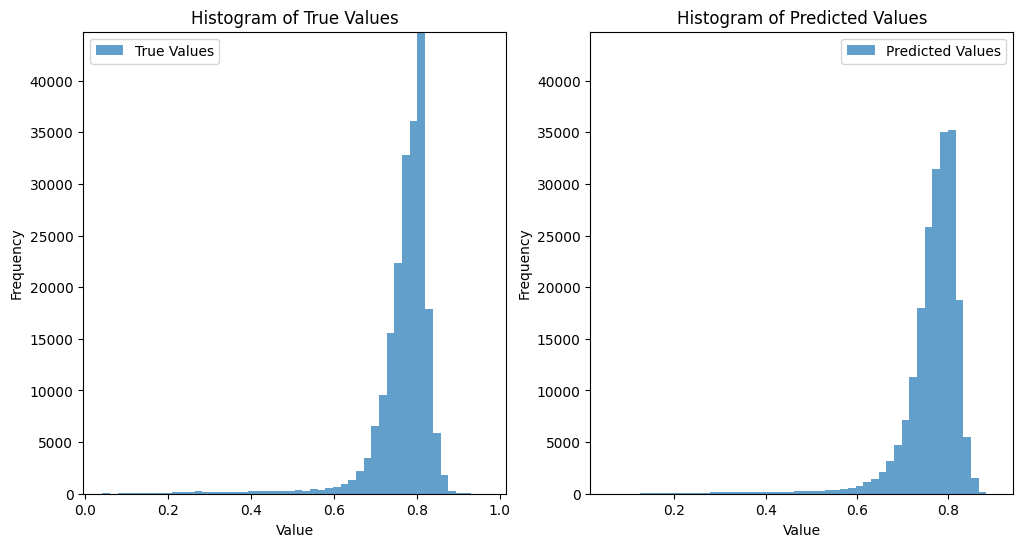

In [2]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import time

def Test_Model(model, test_dataloader, max_speed):
    if type(model) == nn.modules.container.Sequential:
        output_last = model[-1].output_last
    else:
        output_last = model.output_last

    inputs, labels = next(iter(test_dataloader))
    [batch_size, type_size, step_size, fea_size] = inputs.size()

    cur_time = time.time()
    pre_time = time.time()

    use_gpu = torch.cuda.is_available()

    loss_MSE = torch.nn.MSELoss()
    loss_L1 = torch.nn.MSELoss()

    tested_batch = 0

    losses_mse = []
    losses_l1 = []
    MAEs = []
    MAPEs = []

    all_labels = []
    all_outputs = []
    all_inputs = []
    all_forecast_by_memory = []
    all_s_i = []

    for data in test_dataloader:
        inputs, labels = data

        if inputs.shape[0] != batch_size:
            continue

        if use_gpu:
            inputs, labels = inputs.cuda(), labels.cuda()
        else:
            inputs, labels = inputs, labels

        outputs, generation, forecast_by_memory = model(inputs, forecast=True)

        loss_MSE = torch.nn.MSELoss()
        loss_L1 = torch.nn.L1Loss()

        all_s_i.append(model.s_i.cpu().detach().numpy())

        if output_last:
            loss_mse = loss_MSE(torch.squeeze(outputs[:, -1, :]), torch.squeeze(labels[:, 2, :, :]))
            loss_l1 = loss_L1(torch.squeeze(outputs[:, -1, :]), torch.squeeze(labels[:, 2, :, :]))
            MAE = torch.mean(torch.abs(torch.squeeze(outputs[:, -1, :]) - torch.squeeze(labels[:, 2, :, :])))
            MAPE = torch.mean(
                torch.abs(torch.squeeze(outputs[:, -1, :]) - torch.squeeze(labels[:, 2, :, :]))
                / torch.squeeze(labels[:, 2, :, :])
            )
            all_labels.append(labels.cpu().detach().numpy())
            all_outputs.append(outputs.cpu().detach().numpy())
            all_inputs.append(inputs.cpu().detach().numpy())
            all_forecast_by_memory.append(forecast_by_memory.cpu().detach().numpy())

        else:
            loss_mse = loss_MSE(outputs[:, -1, :], labels)
            loss_l1 = loss_L1(outputs[:, -1, :], labels)
            MAE = torch.mean(torch.abs(outputs[:, -1, :] - torch.squeeze(labels)))
            MAPE = torch.mean(torch.abs(outputs[:, -1, :] - torch.squeeze(labels)) / torch.squeeze(labels))

            all_labels.append(labels.cpu().detach().numpy())
            all_outputs.append(outputs[:, -1, :].cpu().detach().numpy())
            all_inputs.append(inputs.cpu().detach().numpy())
            all_forecast_by_memory.append(forecast_by_memory.cpu().detach().numpy())

        losses_mse.append(loss_mse.data.cpu().numpy())
        losses_l1.append(loss_l1.data.cpu().numpy())
        MAEs.append(MAE.data.cpu().numpy())
        MAPEs.append(MAPE.data.cpu().numpy())

        tested_batch += 1

        if tested_batch % 1000 == 0:
            cur_time = time.time()
            print(
                "Tested #: {}, loss_l1: {}, loss_mse: {}, time: {}".format(
                    tested_batch * batch_size,
                    np.around([loss_l1.data[0]], decimals=8),
                    np.around([loss_mse.data[0]], decimals=8),
                    np.around([cur_time - pre_time], decimals=8),
                )
            )
            pre_time = cur_time

    losses_l1 = np.array(losses_l1)
    losses_mse = np.array(losses_mse)
    MAEs = np.array(MAEs)
    MAPEs = np.array(MAPEs)

    mean_l1 = np.mean(losses_l1) * max_speed
    std_l1 = np.std(losses_l1) * max_speed
    MAE_ = np.mean(MAEs) * max_speed
    MAPE_ = np.mean(MAPEs) * 100

    print("Tested: L1_mean: {}, L1_std: {}, MAE: {} MAPE: {}".format(mean_l1, std_l1, MAE_, MAPE_))

    all_labels = np.concatenate(all_labels, axis=0)
    all_outputs = np.concatenate(all_outputs, axis=0)
    all_inputs = np.concatenate(all_inputs,axis=0)
    all_forecast_by_memory = np.concatenate(all_forecast_by_memory,axis=0)
    all_s_i = np.concatenate(all_s_i,axis=0)

    return [losses_l1, losses_mse, mean_l1, std_l1, all_labels, all_outputs, all_inputs, all_forecast_by_memory, all_s_i]

def plot_histograms(true_values, predicted_values, bins=50):
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    true_hist = plt.hist(true_values, bins=bins, alpha=0.7, label='True Values')
    plt.title('Histogram of True Values')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.legend()

    plt.subplot(1, 2, 2)
    predicted_hist = plt.hist(predicted_values, bins=bins, alpha=0.7, label='Predicted Values')
    plt.title('Histogram of Predicted Values')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.legend()

    # Align y-axis limits
    max_y = max(true_hist[0].max(), predicted_hist[0].max())
    plt.subplot(1, 2, 1)
    plt.ylim(0, max_y)
    plt.subplot(1, 2, 2)
    plt.ylim(0, max_y)

    plt.show()

# Example usage
# Assuming `test_dataloader` and `model` are already defined and loaded
# Example value, replace with actual max_speed
results = Test_Model(lgnet, test_dataloader, max_speed)
losses_l1, losses_mse, mean_l1, std_l1, all_labels, all_outputs, all_inputs, all_forecast_by_memory, all_s_i = results

plot_histograms(all_labels[:, 2, :, :].flatten(), all_outputs[:, -1, :].flatten(), bins=50)


In [3]:
print(all_labels.shape)
print(all_outputs.shape)
print(all_inputs.shape)
print(all_forecast_by_memory.shape)
print(all_s_i.shape)

(640, 3, 1, 325)
(640, 10, 325)
(640, 6, 10, 325)
(640, 325, 8)
(640, 8)


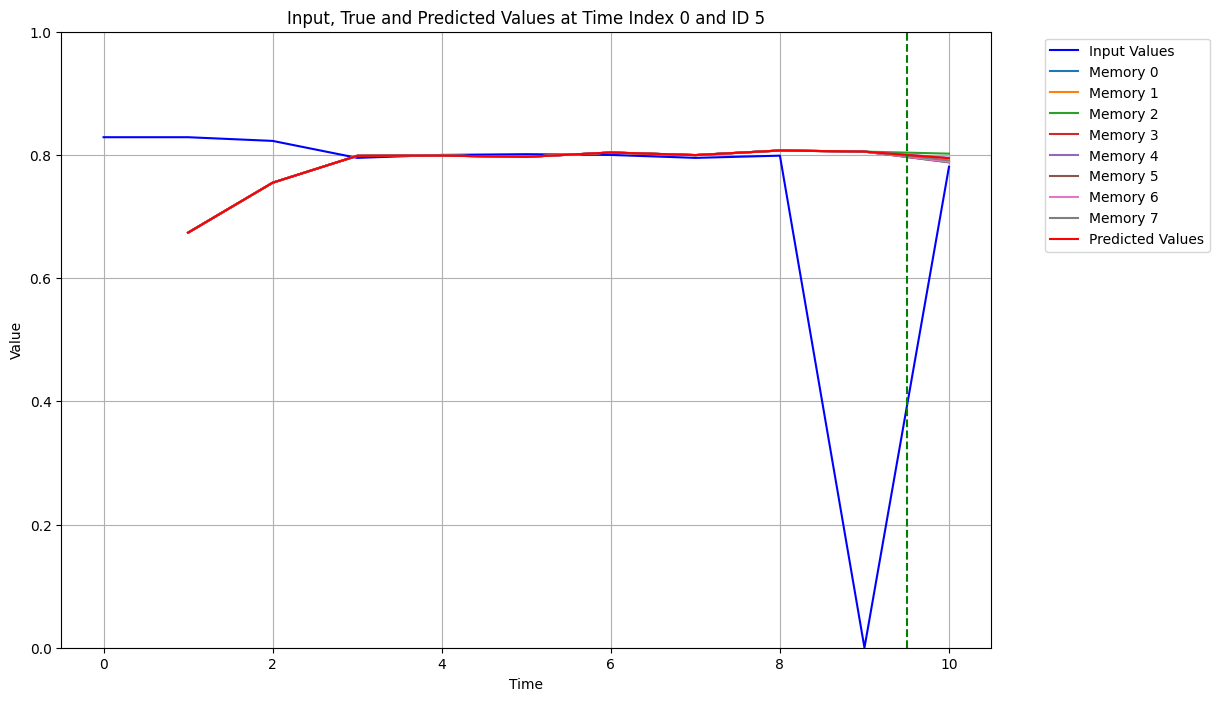

In [4]:
def plot_step_graph(true_values, predicted_values, input_values, forecast_by_memory, time_index, id):
    true_values_time = np.append(input_values[time_index, 0, :, id], true_values[time_index, id])
    predicted_values_time = predicted_values[time_index, :, id]
    num_dimensions = true_values_time.shape[0]

    plt.figure(figsize=(12, 8))

    indices = np.arange(num_dimensions)
    predicted_indices = np.arange(1, predicted_values_time.shape[0] + 1)
    
    plt.plot(indices, true_values_time, linestyle='-', label='Input Values', color='b')

    data_to_plot = forecast_by_memory[time_index, id, :]
    memory_size = data_to_plot.shape[0]
    for memory_index in range(memory_size):
        memory_values_time = np.append(predicted_values[time_index, :num_dimensions-2, id], data_to_plot[memory_index])
        plt.plot(predicted_indices, memory_values_time, label=f'Memory {memory_index}')

    plt.plot(predicted_indices, predicted_values_time, linestyle='-', label='Predicted Values', color='r')

    # Add a vertical dotted line between the second-to-last and last indices
    last_index = indices[-1] - 0.5
    plt.axvline(x=last_index, color='g', linestyle='--')

    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.title(f'Input, True and Predicted Values at Time Index {time_index} and ID {id}')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.ylim(0, 1)
    plt.show()

plot_step_graph(all_labels[:, 2, :, :].squeeze(), all_outputs, all_inputs, all_forecast_by_memory, 0, 5)


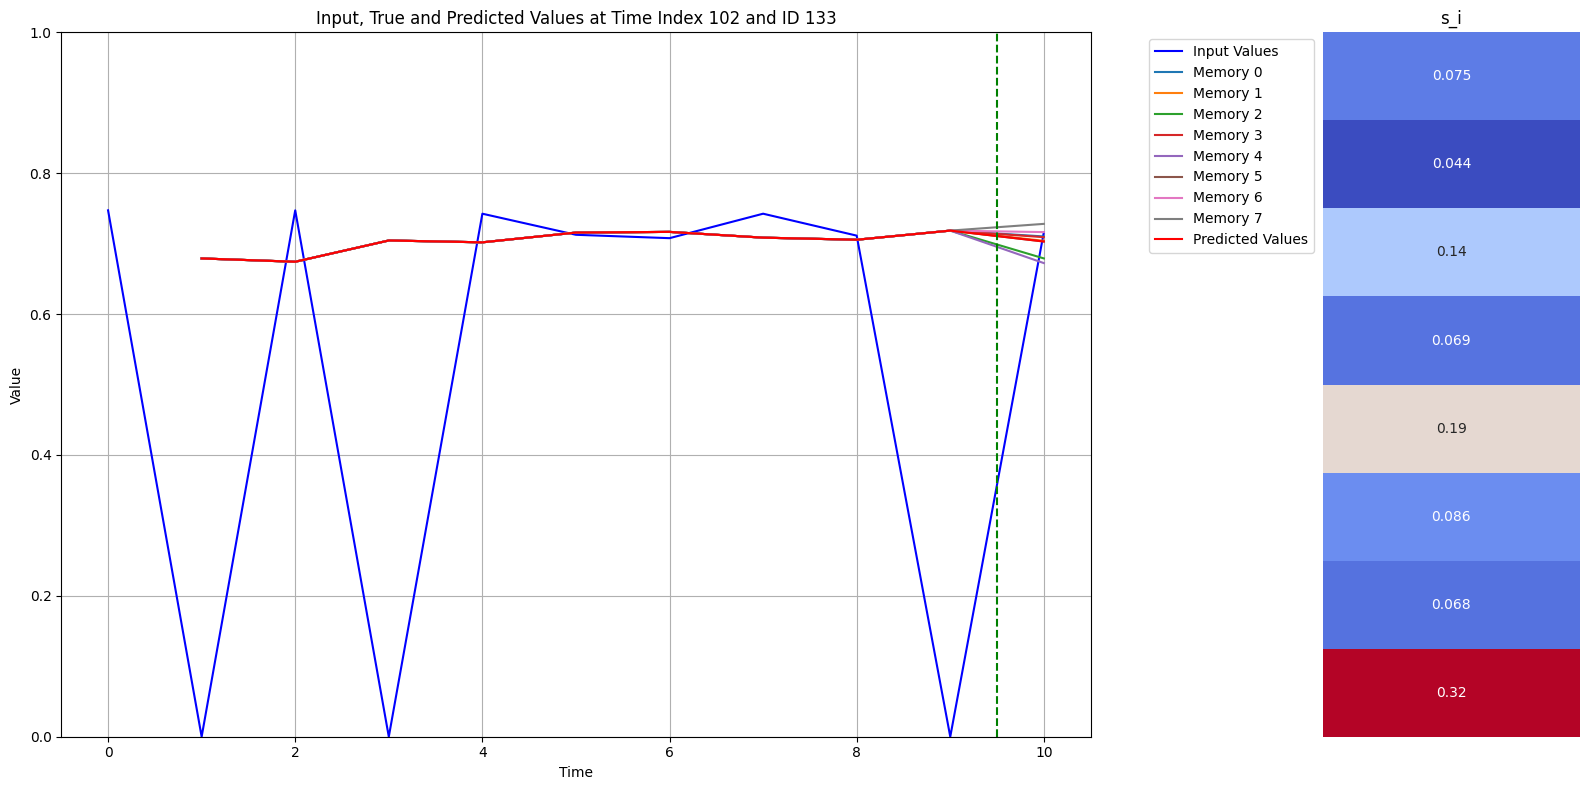

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_step_graph(true_values, predicted_values, input_values, forecast_by_memory, time_index, id, memory_vector):
    # Prepare values for the line plot
    true_values_time = np.append(input_values[time_index, 0, :, id], true_values[time_index, id])
    predicted_values_time = predicted_values[time_index, :, id]
    num_dimensions = true_values_time.shape[0]

    # Create figure with subplots for line plot and heatmap
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), gridspec_kw={'width_ratios': [4, 1]})

    # Line plot (Input, Predicted, True Values)
    indices = np.arange(num_dimensions)
    predicted_indices = np.arange(1, predicted_values_time.shape[0] + 1)

    ax1.plot(indices, true_values_time, linestyle='-', label='Input Values', color='b')

    data_to_plot = forecast_by_memory[time_index, id, :]
    memory_size = data_to_plot.shape[0]
    for memory_index in range(memory_size):
        memory_values_time = np.append(predicted_values[time_index, :num_dimensions-2, id], data_to_plot[memory_index])
        ax1.plot(predicted_indices, memory_values_time, label=f'Memory {memory_index}')

    ax1.plot(predicted_indices, predicted_values_time, linestyle='-', label='Predicted Values', color='r')

    # Add a vertical dotted line between the second-to-last and last indices
    last_index = indices[-1] - 0.5
    ax1.axvline(x=last_index, color='g', linestyle='--')

    ax1.set_xlabel('Time')
    ax1.set_ylabel('Value')
    ax1.set_title(f'Input, True and Predicted Values at Time Index {time_index} and ID {id}')
    ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax1.grid(True)
    ax1.set_ylim(0, 1)

    s_i = memory_vector[time_index, :]

    # Heatmap plot (16-dimensional vector)
    sns.heatmap(s_i.reshape(memory_size, 1), cmap="coolwarm", annot=True, cbar=False, ax=ax2)
    ax2.set_title('s_i')
    ax2.set_yticks([])
    ax2.set_xticks([])  # Hide the y-axis

    plt.tight_layout()
    plt.show()

plot_step_graph(all_labels[:, 2, :, :].squeeze(), all_outputs, all_inputs, all_forecast_by_memory, 102, 133, all_s_i)


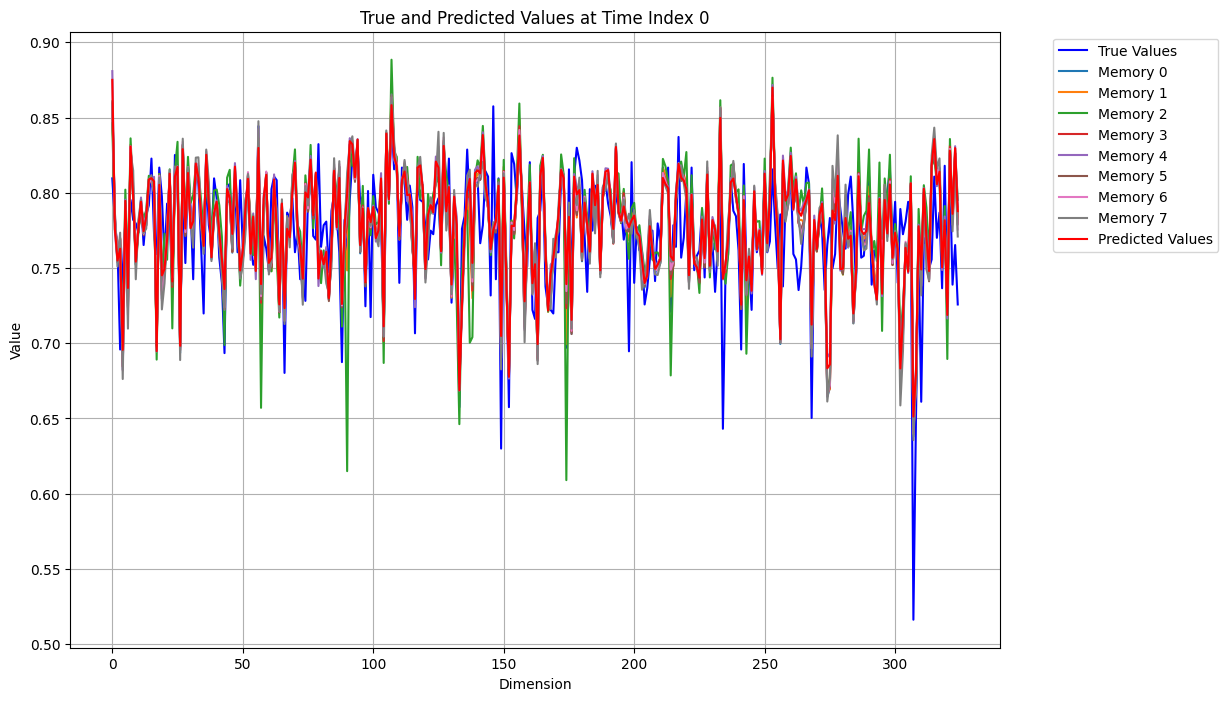

In [6]:
def plot_bar_graph(true_values, predicted_values, forecast_by_memory, time_index):
    true_values_time = true_values[time_index, :]
    predicted_values_time = predicted_values[time_index, :]
    num_dimensions = true_values_time.shape[0]

    plt.figure(figsize=(12, 8))
    indices = np.arange(num_dimensions)

    plt.plot(indices, true_values_time, linestyle='-', label='True Values', color='b')

    data_to_plot = forecast_by_memory[time_index, :, :]
    memory_size = data_to_plot.shape[1]
    for memory_index in range(memory_size):
        memory_values_time = data_to_plot[:, memory_index]
        plt.plot(indices, memory_values_time, label=f'Memory {memory_index}')

    plt.plot(indices, predicted_values_time, linestyle='-', label='Predicted Values', color='r')

    plt.xlabel('Dimension')
    plt.ylabel('Value')
    plt.title(f'True and Predicted Values at Time Index {time_index}')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    #plt.ylim(0, 1)
    plt.show()

time_index_to_visualize = 0
plot_bar_graph(all_labels[:, 2, :, :].squeeze(), all_outputs[:, -1, :].squeeze(), all_forecast_by_memory, time_index_to_visualize)

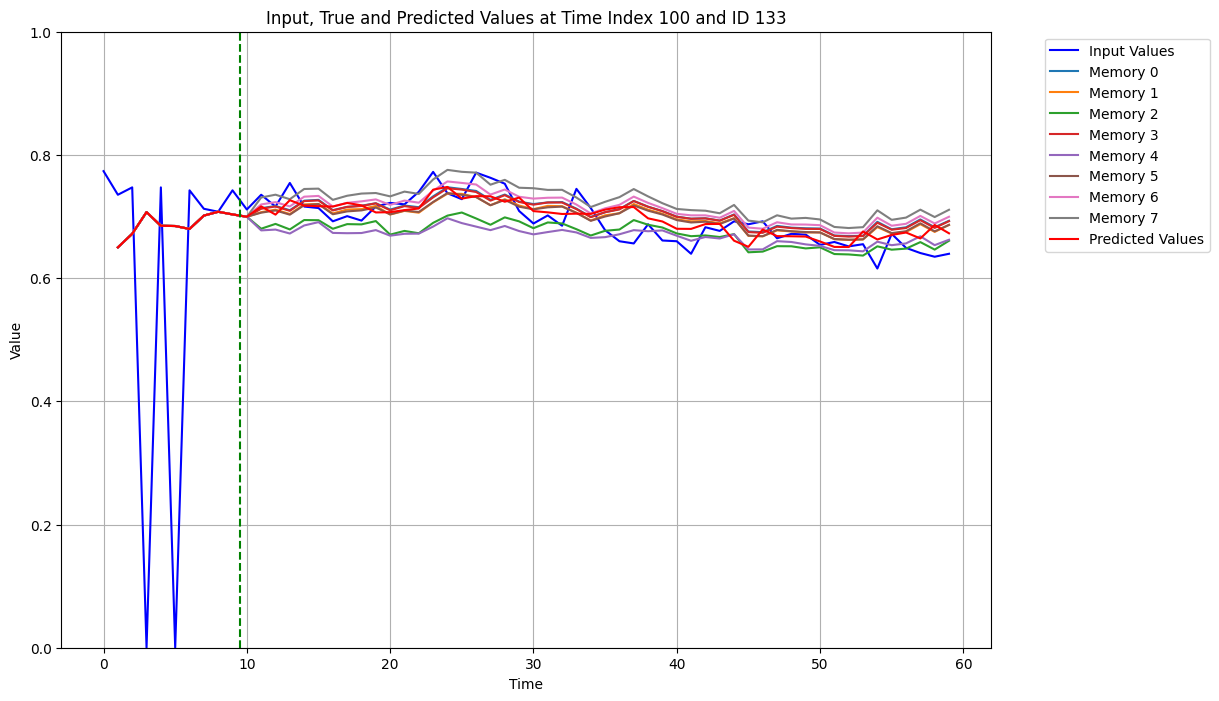

In [7]:
def plot_step_graph(true_values, predicted_values, input_values, forecast_by_memory, time_index, id, stepsize):
    for i in range(stepsize):
        if i==0:
            true_values_time = np.append(input_values[time_index, 0, :, id], true_values[time_index, id])
        else:
            true_values_time = np.append(true_values_time, true_values[time_index + i, id])
    
    for i in range(stepsize):
        if i==0:
            predicted_values_time = predicted_values[time_index, :, id]
        else:
            predicted_values_time = np.append(predicted_values_time, predicted_values[time_index + i, -1, id])
    
    num_dimensions = true_values_time.shape[0]

    plt.figure(figsize=(12, 8))

    indices = np.arange(num_dimensions)
    predicted_indices = np.arange(1, predicted_values_time.shape[0] + 1)
    
    plt.plot(indices, true_values_time, linestyle='-', label='Input Values', color='b')

    data_to_plot = forecast_by_memory[:, id, :]
    memory_size = data_to_plot.shape[1]
    for memory_index in range(memory_size):
        for i in range(stepsize-1):
            if i==0:
                memory_values_time = np.append(predicted_values[time_index, :num_dimensions-2, id], data_to_plot[time_index, memory_index])
            else:
                memory_values_time = np.append(memory_values_time, data_to_plot[time_index + i, memory_index])
        
        plt.plot(predicted_indices, memory_values_time, label=f'Memory {memory_index}')

    plt.plot(predicted_indices, predicted_values_time, linestyle='-', label='Predicted Values', color='r')

    # Add a vertical dotted line between the second-to-last and last indices
    last_index = 9.5
    plt.axvline(x=last_index, color='g', linestyle='--')

    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.title(f'Input, True and Predicted Values at Time Index {time_index} and ID {id}')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.ylim(0, 1)
    plt.show()

plot_step_graph(all_labels[:, 2, :, :].squeeze(), all_outputs, all_inputs, all_forecast_by_memory, 100, 133, 50)

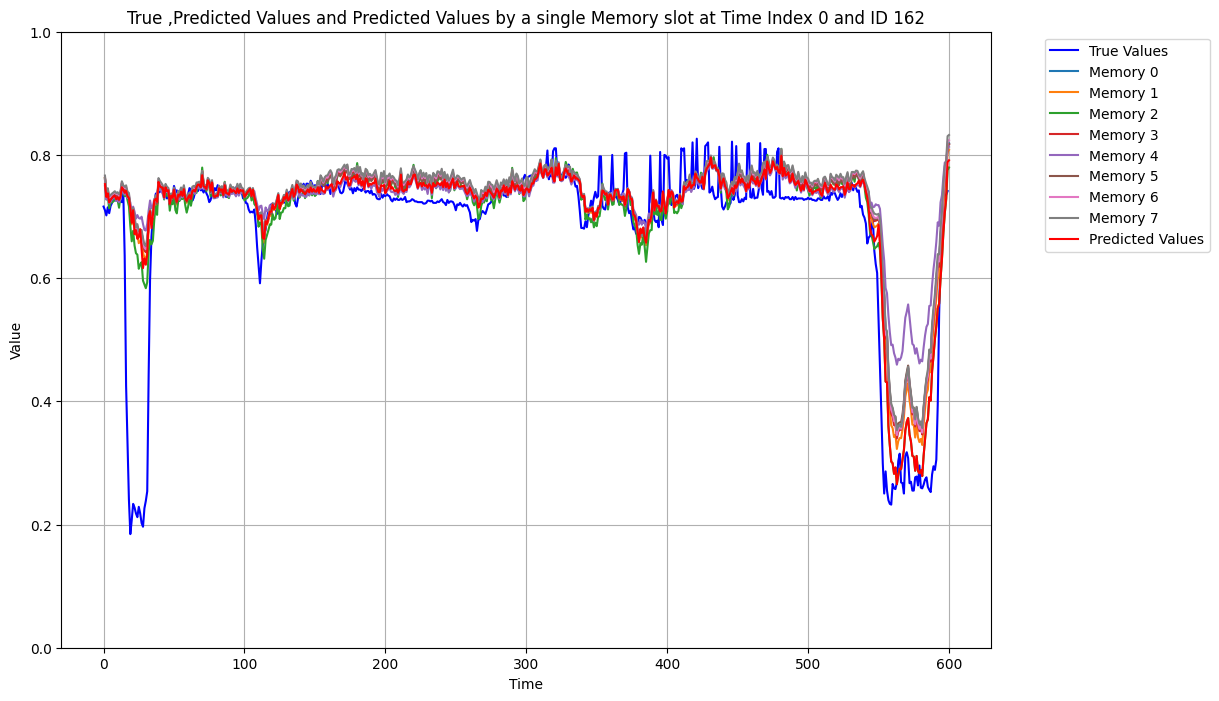

In [8]:
def plot_step_graph(true_values, predicted_values, input_values, forecast_by_memory, time_index, id, stepsize):
    for i in range(stepsize):
        if i==0:
            true_values_time = true_values[time_index, id]
        else:
            true_values_time = np.append(true_values_time, true_values[time_index + i, id])
    
    for i in range(stepsize):
        if i==0:
            predicted_values_time = predicted_values[time_index, -1, id]
        else:
            predicted_values_time = np.append(predicted_values_time, predicted_values[time_index + i, -1, id])
    
    num_dimensions = true_values_time.shape[0]

    plt.figure(figsize=(12, 8))

    indices = np.arange(num_dimensions)
    predicted_indices = np.arange(1, predicted_values_time.shape[0] + 1)
    
    plt.plot(indices, true_values_time, linestyle='-', label='True Values', color='b')

    data_to_plot = forecast_by_memory[:, id, :]
    memory_size = data_to_plot.shape[1]
    for memory_index in range(memory_size):
        for i in range(stepsize):
            if i==0:
                memory_values_time = data_to_plot[time_index, memory_index]
            else:
                memory_values_time = np.append(memory_values_time, data_to_plot[time_index + i, memory_index])
        
        plt.plot(predicted_indices, memory_values_time, label=f'Memory {memory_index}')

    plt.plot(predicted_indices, predicted_values_time, linestyle='-', label='Predicted Values', color='r')


    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.title(f'True ,Predicted Values and Predicted Values by a single Memory slot at Time Index {time_index} and ID {id}')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.ylim(0, 1)
    plt.show()

plot_step_graph(all_labels[:, 2, :, :].squeeze(), all_outputs, all_inputs, all_forecast_by_memory, 0, 162, 600)

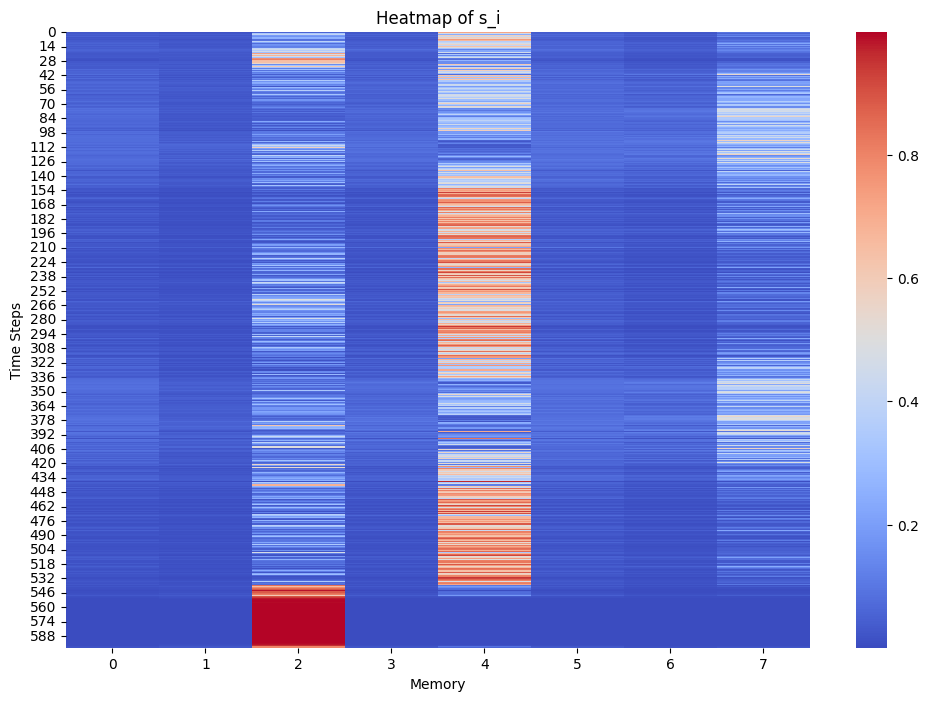

In [9]:
def plot_heatmap_all_s_i(s_i):
    plt.figure(figsize=(12, 8))
    sns.heatmap(s_i, cmap="coolwarm", cbar=True)

    plt.title("Heatmap of s_i")
    plt.xlabel("Memory")
    plt.ylabel("Time Steps")
    plt.show()

plot_heatmap_all_s_i(all_s_i[0:600, :])

/tmp/ipykernel_88320/34275171.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', end_index - start_index + 1)  # カラーマップを使用


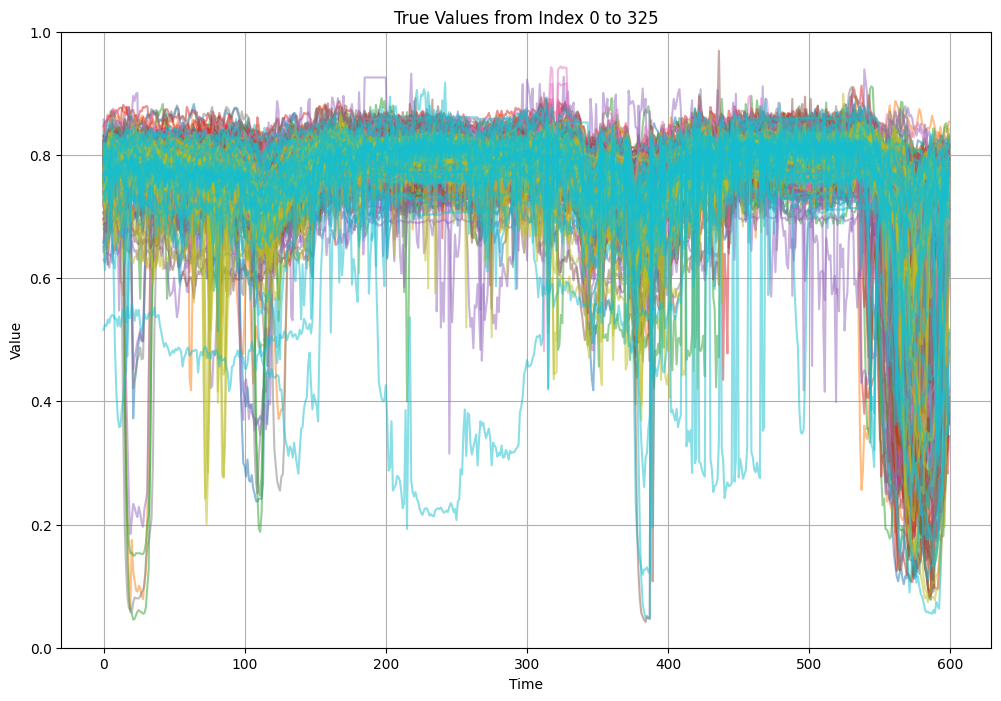

In [10]:
def plot_graph(speed_values, start_index, end_index, time_index, step_size):
    plt.figure(figsize=(12, 8))
    speed_values = speed_values[time_index:time_index + step_size, :]
    indices = np.arange(speed_values.shape[0])
    colors = plt.cm.get_cmap('tab10', end_index - start_index + 1)  # カラーマップを使用

    for i, idx in enumerate(range(start_index, end_index + 1)):
        if idx < speed_values.shape[1]:  # Ensure the index is within bounds
            values_index = speed_values[:, idx]
            plt.plot(indices, values_index, linestyle='-', label=f'Values at Index {idx}', 
                     color=colors(i), alpha=0.5)

    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.title(f'True Values from Index {start_index} to {end_index}')
    #plt.legend()
    plt.grid(True)
    plt.ylim(0, 1)
    plt.show()

plot_graph(all_labels[:, 2, :, :].squeeze(), 0, 325, 0, 600)

In [11]:
print(all_labels.shape)
print(all_outputs.shape)
print(all_inputs.shape)
print(all_forecast_by_memory.shape)
print(all_s_i.shape)

def eval_perf(labels, outputs, max_speed):

    time_num = labels.shape[0]
    labels = torch.from_numpy(labels.astype(np.float32)).clone()
    outputs = torch.from_numpy(outputs.astype(np.float32)).clone()

    loss_MSE = torch.nn.MSELoss()
    loss_L1 = torch.nn.MSELoss()

    losses_mse = []
    losses_l1 = []
    MAEs = []
    MAPEs = []

    loss_MSE = torch.nn.MSELoss()
    loss_L1 = torch.nn.L1Loss()

    for t in range(time_num):

        loss_mse = loss_MSE(torch.squeeze(outputs[t, :]), torch.squeeze(labels[t, :]))
        loss_l1 = loss_L1(torch.squeeze(outputs[t, :]), torch.squeeze(labels[t, :]))
        MAE = torch.mean(torch.abs(torch.squeeze(outputs[t, :]) - torch.squeeze(labels[t, :])))
        MAPE = torch.mean(
            torch.abs(torch.squeeze(outputs[t, :]) - torch.squeeze(labels[t, :]))
            / torch.squeeze(labels[t, :])
        )

        losses_mse.append(loss_mse.data.cpu().numpy())
        losses_l1.append(loss_l1.data.cpu().numpy())
        MAEs.append(MAE.data.cpu().numpy())
        MAPEs.append(MAPE.data.cpu().numpy())


    losses_l1 = np.array(losses_l1)
    losses_mse = np.array(losses_mse)
    MAEs = np.array(MAEs)
    MAPEs = np.array(MAPEs)

    mean_l1 = np.mean(losses_l1) * max_speed
    std_l1 = np.std(losses_l1) * max_speed
    MAE_ = np.mean(MAEs) * max_speed
    MAPE_ = np.mean(MAPEs) * 100

    print("Tested: L1_mean: {}, L1_std: {}, MAE: {}, MAPE: {}".format(mean_l1, std_l1, MAE_, MAPE_))

    return [mean_l1, std_l1, MAE_, MAPE_]


results = []
[mean_l1, std_l1, MAE_, MAPE_] = eval_perf(all_labels[:, 2, :, :], all_outputs[:, -1, :], max_speed)
results.append(
    {
        "model": "LGnet",
        "L1_mean": mean_l1,
        "L1_std": std_l1,
        "MAE": MAE_,
        "MAPE": MAPE_,
    }
)
for m in range(all_forecast_by_memory.shape[2]):
    [mean_l1, std_l1, MAE_, MAPE_] = eval_perf(all_labels[:, 2, :, :], all_forecast_by_memory[:, :, m], max_speed)
    results.append(
        {
            "model": "memory" + str(m),
            "L1_mean": mean_l1,
            "L1_std": std_l1,
            "MAE": MAE_,
            "MAPE": MAPE_,
        }
    )

df = pd.DataFrame(results)

# Function to bold the minimum value in each column
def highlight_min(s):
    is_min = s == s.min()
    return ['font-weight: bold' if v else '' for v in is_min]

# Apply the styling to the DataFrame
styled_df = df.style.apply(highlight_min, subset=['L1_mean', 'L1_std', 'MAE', 'MAPE'])

# Display the styled DataFrame
styled_df

df.to_csv('/workspaces/STdata_prediction/src/LGnet/output/results_memory.csv', index=False)

(640, 3, 1, 325)
(640, 10, 325)
(640, 6, 10, 325)
(640, 325, 8)
(640, 8)
Tested: L1_mean: 2.088460278697312, L1_std: 0.6952801463194191, MAE: 2.088460278697312, MAPE: 4.022172838449478
Tested: L1_mean: 2.228684422560036, L1_std: 0.7513491027057171, MAE: 2.228684422560036, MAPE: 4.372197762131691
Tested: L1_mean: 2.2079644445329905, L1_std: 0.6993785402737558, MAE: 2.2079644445329905, MAPE: 4.278716072440147
Tested: L1_mean: 2.381185551173985, L1_std: 0.6069447556510568, MAE: 2.381185551173985, MAPE: 4.443792998790741
Tested: L1_mean: 2.2085591945797205, L1_std: 0.734489711932838, MAE: 2.2085591945797205, MAPE: 4.321403056383133
Tested: L1_mean: 2.1657415460795164, L1_std: 1.0729231741279364, MAE: 2.1657415460795164, MAPE: 4.597070068120956
Tested: L1_mean: 2.201418461278081, L1_std: 0.7594717801548541, MAE: 2.201418461278081, MAPE: 4.337708279490471
Tested: L1_mean: 2.232104390859604, L1_std: 0.7538099898956716, MAE: 2.232104390859604, MAPE: 4.3793316930532455
Tested: L1_mean: 2.327541

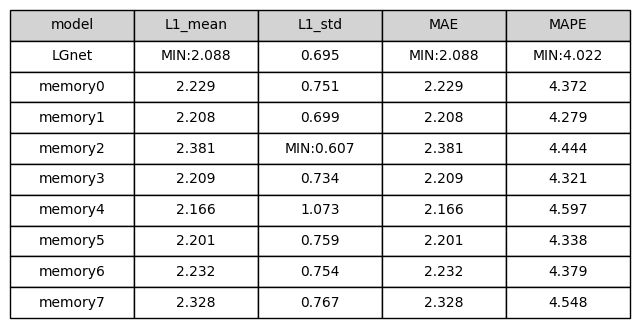

In [12]:
from pandas.plotting import table
from matplotlib.table import Table

df[['L1_mean', 'L1_std', 'MAE', 'MAPE']] = df[['L1_mean', 'L1_std', 'MAE', 'MAPE']].round(3)

# Function to check if a value is the minimum in the column
def is_min_in_column(column, value):
    return value == column.min()


# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 4))  # Adjust size if necessary
ax.axis('off')

# Create a table
tbl = Table(ax, bbox=[0, 0, 1, 1])

# Get column widths based on number of columns
n_cols = len(df.columns)
col_widths = [1.0 / n_cols] * n_cols

# Add table cells with bold formatting for the minimum values
for i, col in enumerate(df.columns):
    # Header
    tbl.add_cell(0, i, width=col_widths[i], height=0.3, text=col, loc='center', facecolor='lightgray')
    
    # Data cells
    for j in range(df.shape[0]):
        value = df.iloc[j, i]
        if is_min_in_column(df[col], value) and col != "pre model" and col != "model":
            text = f"MIN:{value}"  # Bold the text
        else:
            text = f"{value}"
        
        tbl.add_cell(j + 1, i, width=col_widths[i], height=0.3, text=text, loc='center')

# Add table to the axis
ax.add_table(tbl)

# Save the table as an image
plt.savefig('results_table_bold_min.png', bbox_inches='tight', dpi=300)

# Show the plot (optional)
plt.show()

plt.show()

In [18]:
def eval_perf_sensor(labels, outputs, max_speed):

    time_num = labels.shape[0]
    sensor_num = labels.shape[2]
    labels = torch.from_numpy(labels.astype(np.float32)).clone()
    outputs = torch.from_numpy(outputs.astype(np.float32)).clone()

    loss_MSE = torch.nn.MSELoss()
    loss_L1 = torch.nn.MSELoss()

    labels = labels.squeeze()
    outputs = outputs.squeeze()

    results = []

    for i in range(sensor_num):
        losses_mse = []
        losses_l1 = []
        MAEs = []
        MAPEs = []

        loss_MSE = torch.nn.MSELoss()
        loss_L1 = torch.nn.L1Loss()

        for t in range(time_num):

            loss_mse = loss_MSE(torch.squeeze(outputs[t, i]), torch.squeeze(labels[t, i]))
            loss_l1 = loss_L1(torch.squeeze(outputs[t, i]), torch.squeeze(labels[t, i]))
            MAE = torch.mean(torch.abs(torch.squeeze(outputs[t, i]) - torch.squeeze(labels[t, i])))
            MAPE = torch.mean(
                torch.abs(torch.squeeze(outputs[t, i]) - torch.squeeze(labels[t, i]))
                / torch.squeeze(labels[t, i])
            )

            losses_mse.append(loss_mse.data.cpu().numpy())
            losses_l1.append(loss_l1.data.cpu().numpy())
            MAEs.append(MAE.data.cpu().numpy())
            MAPEs.append(MAPE.data.cpu().numpy())


        losses_l1 = np.array(losses_l1)
        losses_mse = np.array(losses_mse)
        MAEs = np.array(MAEs)
        MAPEs = np.array(MAPEs)

        mean_l1 = np.mean(losses_l1) * max_speed
        std_l1 = np.std(losses_l1) * max_speed
        MAE_ = np.mean(MAEs) * max_speed
        MAPE_ = np.mean(MAPEs) * 100

        results.append(
            {
                "sensor_id": i,
                "L1_mean": mean_l1,
                "L1_std": std_l1,
                "MAE": MAE_,
                "MAPE": MAPE_,
            }
        )

    return results


data = eval_perf_sensor(all_labels[:, 2, :, :], all_outputs[:, -1, :], max_speed)

In [19]:
df = pd.DataFrame(data)
print(df)

     sensor_id   L1_mean    L1_std       MAE      MAPE
0            0  1.783631  2.180952  1.783631  2.717445
1            1  1.518992  1.141629  1.518992  2.410808
2            2  2.144815  1.686782  2.144815  3.543961
3            3  4.803977  1.956442  4.803977  8.301434
4            4  4.181119  3.242387  4.181119  7.758655
..         ...       ...       ...       ...       ...
320        320  2.206674  2.250591  2.206674  4.020922
321        321  1.393481  2.107212  1.393481  2.075225
322        322  1.519798  1.961982  1.519798  2.434024
323        323  2.066050  2.755979  2.066050  3.141629
324        324  2.205630  4.551823  2.205630  3.713756

[325 rows x 5 columns]


In [20]:
file_path = '/workspaces/STdata_prediction/src/ST-graph/input/graph_sensor_locations_bay.csv'
graph_data = pd.read_csv(file_path)
indexes = graph_data['index']
latitudes = graph_data['latitude']
longitudes = graph_data['longitude']
mae_values = df['MAE']
mape_values = df['MAPE']

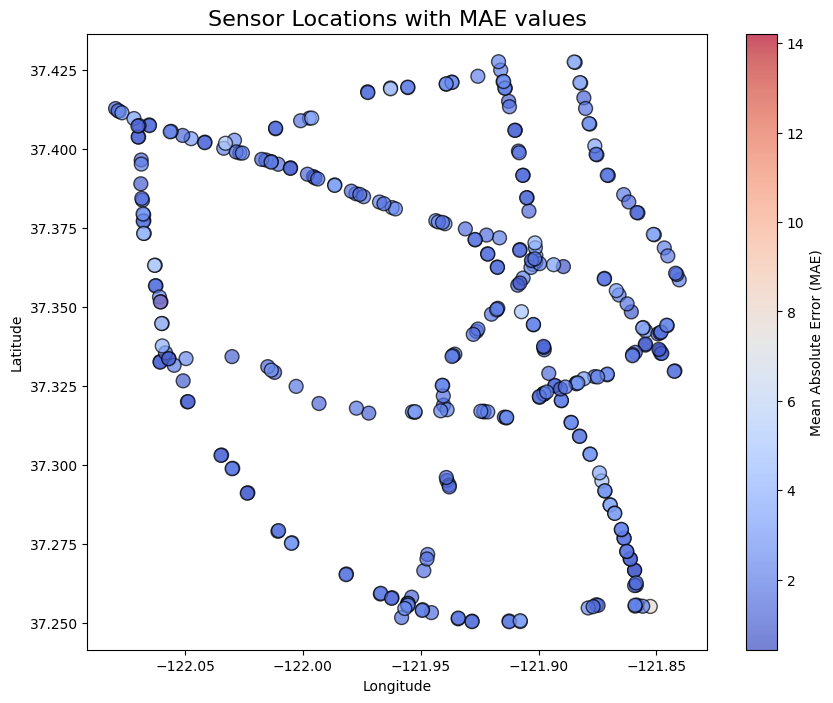

In [21]:
# プロットの設定
plt.figure(figsize=(10, 8))
norm = plt.Normalize(vmin=mae_values.min(), vmax=mae_values.max())
cmap = sns.color_palette("coolwarm", as_cmap=True)

# 散布図の作成（MAEに応じた色をつける）
plt.scatter(longitudes, latitudes, c=mae_values, cmap=cmap, norm=norm, s=100, edgecolor='k', alpha=0.7)

# カラーバーの追加
plt.colorbar(label='Mean Absolute Error (MAE)', orientation="vertical")

# グラフのタイトルとラベル設定
plt.title('Sensor Locations with MAE values', fontsize=16)
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# グラフを表示
plt.show()

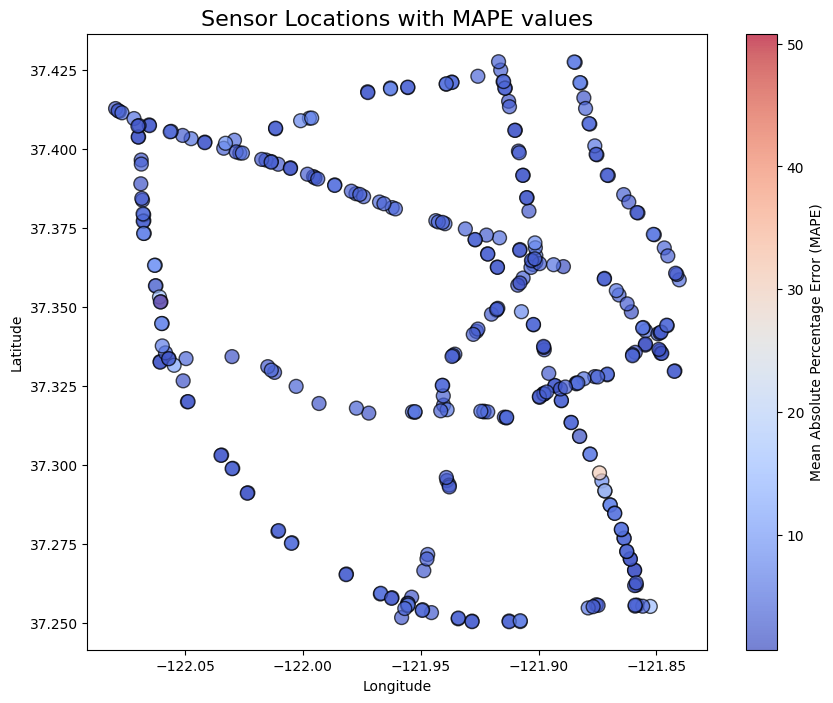

In [22]:
# プロットの設定
plt.figure(figsize=(10, 8))
norm = plt.Normalize(vmin=mape_values.min(), vmax=mape_values.max())
cmap = sns.color_palette("coolwarm", as_cmap=True)

# 散布図の作成（MAPEに応じた色をつける）
plt.scatter(longitudes, latitudes, c=mape_values, cmap=cmap, norm=norm, s=100, edgecolor='k', alpha=0.7)

# カラーバーの追加
plt.colorbar(label='Mean Absolute Percentage Error (MAPE)', orientation="vertical")

# グラフのタイトルとラベル設定
plt.title('Sensor Locations with MAPE values', fontsize=16)
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# グラフを表示
plt.show()